<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
import pandas as pd

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

In [6]:
data = pd.read_csv(url, sep=';')

In [7]:
data.head()

,"Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen"
0,"2,3,12669,9656,7561,214,2674,1338"
1,"2,3,7057,9810,9568,1762,3293,1776"
2,"2,3,6353,8808,7684,2405,3516,7844"
3,"1,3,13265,1196,4221,6404,507,1788"
4,"2,3,22615,5410,7198,3915,1777,5185"


In [8]:
data.describe()

,"Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen"
count,440
unique,440
top,"2,3,12669,9656,7561,214,2674,1338"
freq,1


In [9]:
data.info()
data.shape
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 1 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen  440 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen    0
dtype: int64

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



In [10]:

data.columns

Index(['Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen'], dtype='object')

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
whos

Variable                Type         Data/Info
----------------------------------------------
DataConversionWarning   type         <class 'sklearn.exception<...>s.DataConversionWarning'>
X                       DataFrame         Channel  Fresh   Mil<...>n\n[440 rows x 7 columns]
data                    DataFrame        Channel,Region,Fresh,<...>n\n[440 rows x 1 columns]
fetch_ucirepo           function     <function fetch_ucirepo at 0x0000016DC95C7560>
np                      module       <module 'numpy' from 'd:\<...>ges\\numpy\\__init__.py'>
pd                      module       <module 'pandas' from 'd:<...>es\\pandas\\__init__.py'>
plt                     module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns                     module       <module 'seaborn' from 'd<...>s\\seaborn\\__init__.py'>
url                     str          https://archive.ics.uci.e<...>le%20customers%20data.csv
warnings                module       <module 'warnings' from '<...>conda\\Lib\

**Your comment here**

-  ...
-  ...

In [12]:
# Drop duplicates (rare in UCI Wholesale dataset but still good to check)
X = X.drop_duplicates()

# Check for missing values
print("Missing values:\n", X.isna().sum())

# If any missing values exist, fill them (but usually this dataset has none)
X = X.fillna(X.median())

# Optional: handle skewed variables using log transform (common for Wholesale dataset)
import numpy as np

skewed_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in skewed_cols:
    X[col] = np.log1p(X[col])

Missing values:
 Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [13]:
#I checked the dataset and there were no missing values or duplicate rows.

#The only issue I found was that some of the numerical features were very skewed, so I applied a log transformation to make them more balanced.

#Apart from that, the data was already clean and didn’t need any major changes.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
from sklearn.preprocessing import StandardScaler

# initialize scaler
scaler = StandardScaler()

# fit and transform X (your features)
customers_scale = scaler.fit_transform(X)

# check the output shape
customers_scale[:5]


array([[ 1.44865163,  0.4861845 ,  0.97629884,  0.44015468, -1.50924981,
         0.64414327,  0.40896595],
       [ 1.44865163,  0.08788863,  0.99095612,  0.65217085,  0.13405226,
         0.76604314,  0.62792606],
       [ 1.44865163,  0.01635628,  0.89115098,  0.45468702,  0.37689926,
         0.80440496,  1.77683339],
       [-0.69029709,  0.51747725, -0.95797283, -0.08479166,  1.14157433,
        -0.3287115 ,  0.63313326],
       [ 1.44865163,  0.8806309 ,  0.43966195,  0.39584651,  0.75732216,
         0.40493851,  1.4565879 ]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
from sklearn.cluster import KMeans


# create the model (you can try k=3 or any other number)
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the model on the scaled data
kmeans.fit(customers_scale)

# assign the labels back to the original data
X['labels'] = kmeans.labels_

# show the first few rows
X.head()


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,2
1,2,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,2
2,2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,2
3,1,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1
4,2,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,2


### Looking to the elbow we can choose 2 like the correct number of clusters

In [17]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [18]:
from sklearn.cluster import KMeans

# choose k=2 based on the elbow method
kmeans = KMeans(n_clusters=2, random_state=42)

# fit on the scaled data
kmeans.fit(customers_scale)

# add cluster labels to the original dataset
X['labels'] = kmeans.labels_

# view result
X.head()


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,0
1,2,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,0
2,2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,0
3,1,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1
4,2,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,0


Count the values in `labels`.

In [19]:
X['labels'].value_counts().to_frame('count')

,count
labels,
1,285
0,155


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [20]:
from sklearn.cluster import DBSCAN 


# initialize DBSCAN with eps=0.5
dbscan = DBSCAN(eps=0.5)

# fit the model on scaled data
dbscan.fit(customers_scale)

# assign the labels to the original dataset
X['labels_DBSCAN'] = dbscan.labels_

# check the first few rows
X.head()



,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,0,-1
1,2,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,0,-1
2,2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,0,-1
3,1,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1,-1
4,2,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,0,-1


Count the values in `labels_DBSCAN`.

In [21]:
X['labels_DBSCAN'].value_counts()



labels_DBSCAN
-1    440
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [22]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

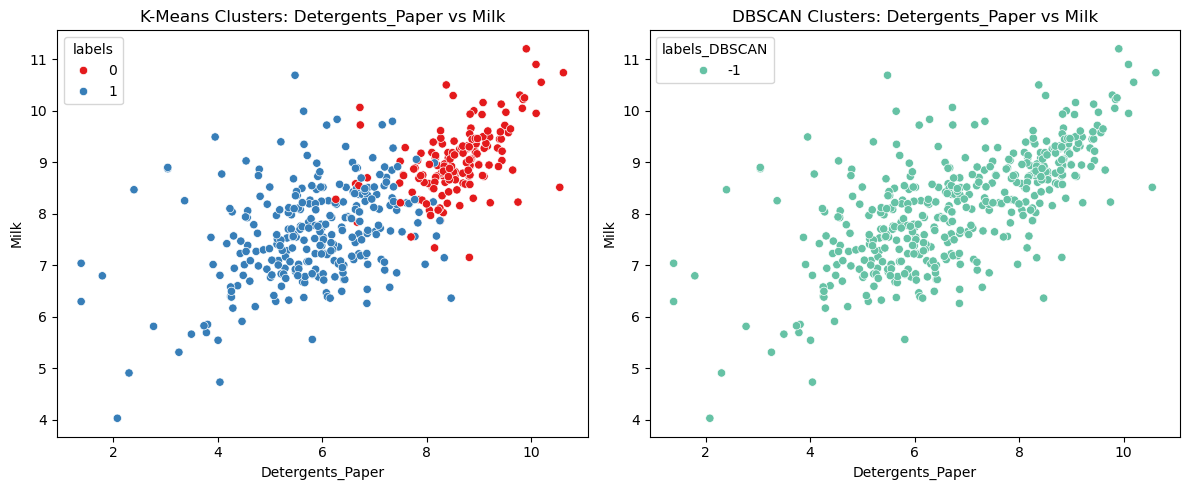

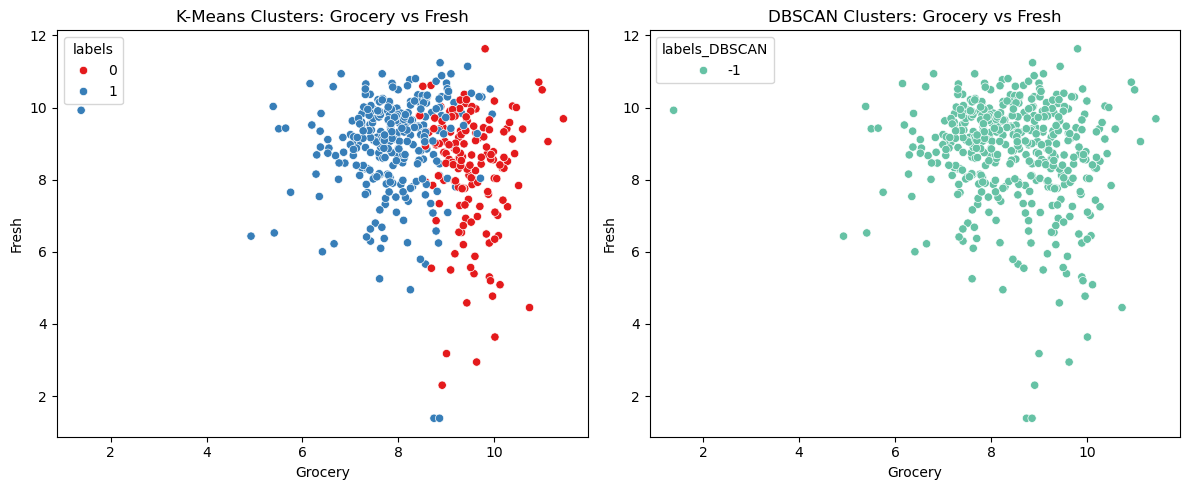

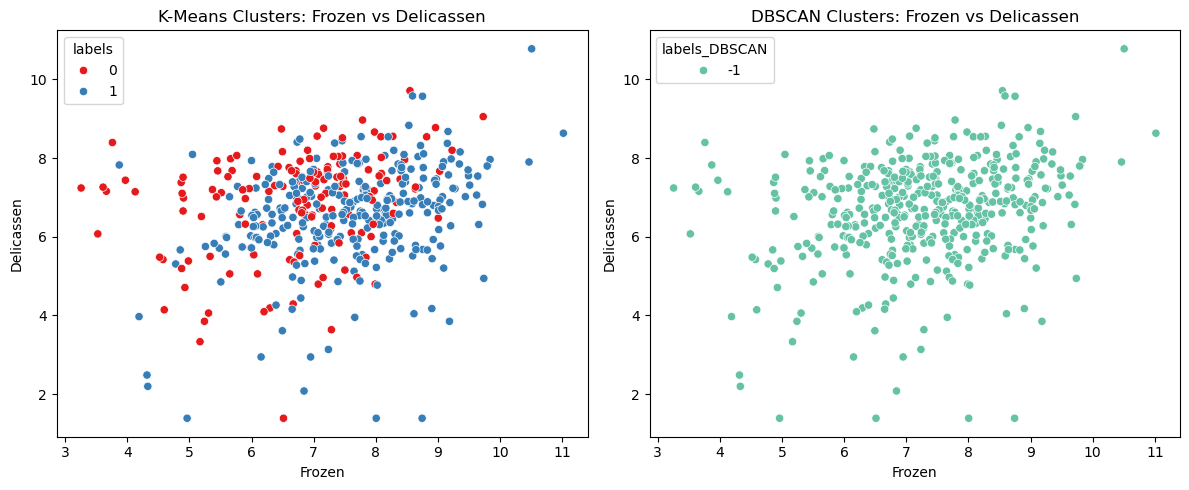

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of column pairs to visualize
column_pairs = [
    ('Detergents_Paper', 'Milk'),
    ('Grocery', 'Fresh'),
    ('Frozen', 'Delicassen')
]

for x_col, y_col in column_pairs:
    plt.figure(figsize=(12, 5))
    
    # K-Means plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=X, x=x_col, y=y_col, hue='labels', palette='Set1')
    plt.title(f'K-Means Clusters: {x_col} vs {y_col}')
    
    # DBSCAN plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=X, x=x_col, y=y_col, hue='labels_DBSCAN', palette='Set2')
    plt.title(f'DBSCAN Clusters: {x_col} vs {y_col}')
    
    plt.tight_layout()
    plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

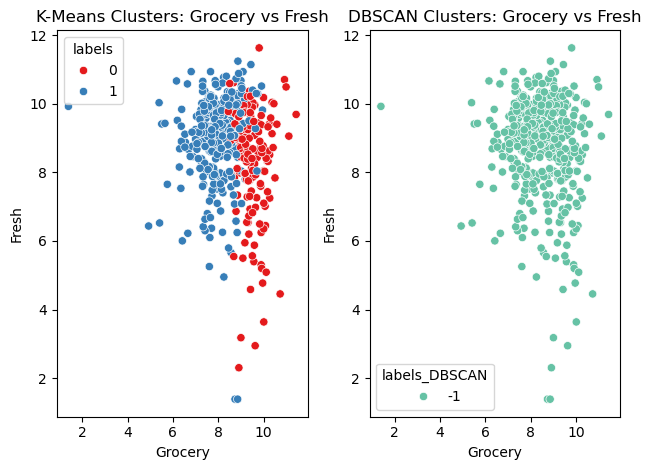

In [24]:
# K-Means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='Grocery', y='Fresh', hue='labels', palette='Set1')
plt.title('K-Means Clusters: Grocery vs Fresh')

# DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='Set2')
plt.title('DBSCAN Clusters: Grocery vs Fresh')

plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

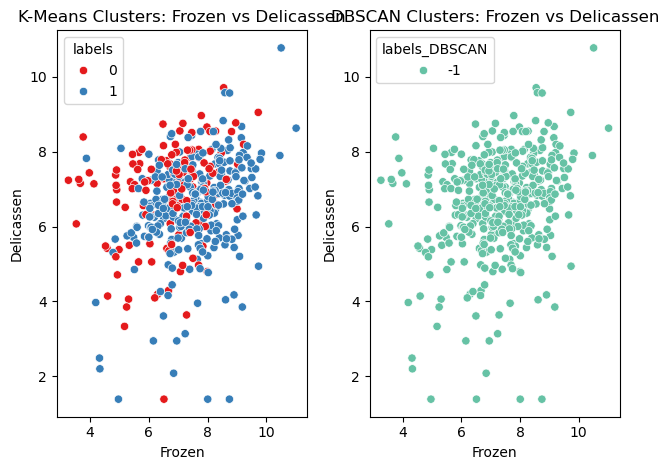

In [25]:
# K-Means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='Frozen', y='Delicassen', hue='labels', palette='Set1')
plt.title('K-Means Clusters: Frozen vs Delicassen')

# DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette='Set2')
plt.title('DBSCAN Clusters: Frozen vs Delicassen')

plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [26]:
# Group by K-Means labels
kmeans_means = X.groupby('labels').mean()
print("Mean values per K-Means cluster:")
print(kmeans_means)

# Group by DBSCAN labels
dbscan_means = X.groupby('labels_DBSCAN').mean()
print("\nMean values per DBSCAN cluster:")
print(dbscan_means)


Mean values per K-Means cluster:
         Channel     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
labels                                                                       
0       1.903226  8.285773  9.036596  9.500957  6.777205          8.588476   
1       1.007018  8.975941  7.623995  7.866393  7.589156          5.814632   

        Delicassen  labels_DBSCAN  
labels                             
0         6.893150           -1.0  
1         6.550328           -1.0  

Mean values per DBSCAN cluster:
                Channel     Fresh      Milk   Grocery    Frozen  \
labels_DBSCAN                                                     
-1             1.322727  8.732813  8.121615  8.442205  7.303128   

               Detergents_Paper  Delicassen    labels  
labels_DBSCAN                                          
-1                     6.791781    6.671094  0.647727  


Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

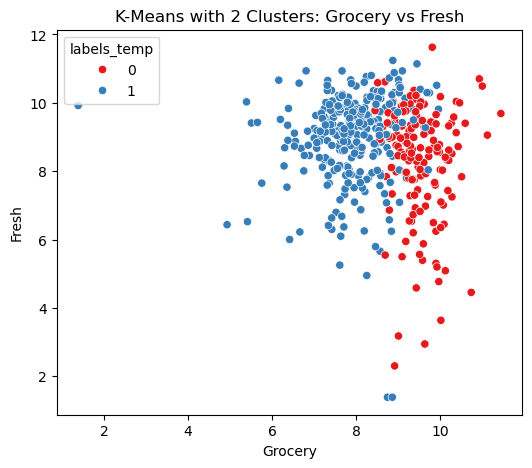

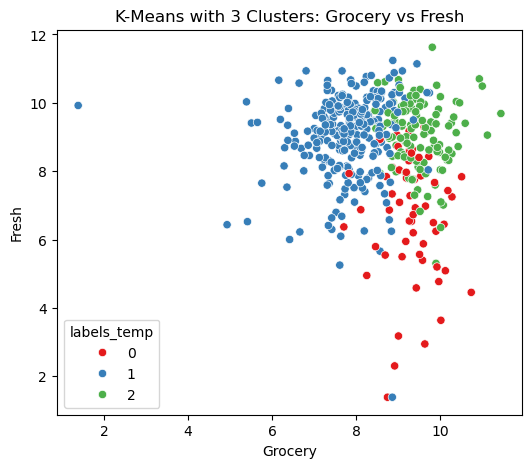

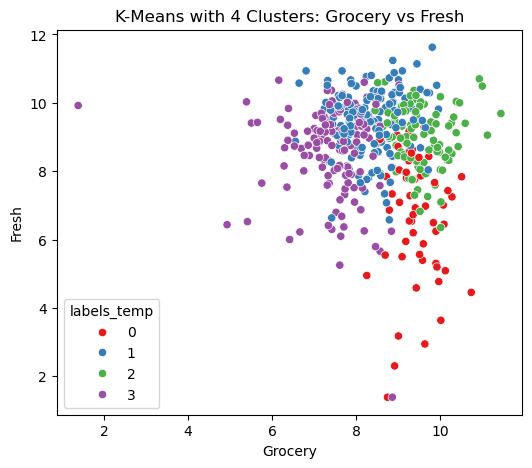

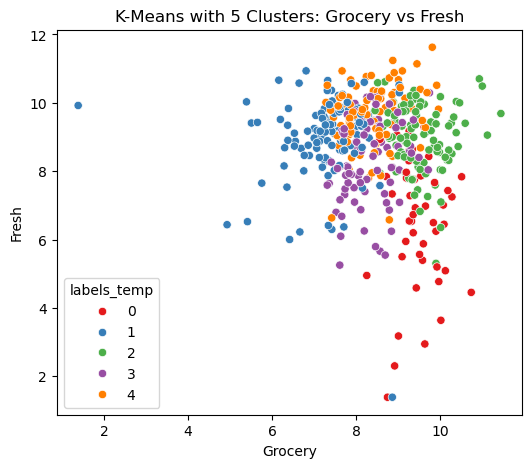

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Different cluster numbers to try
cluster_options = [2, 3, 4, 5]

for k in cluster_options:
    # Initialize and fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    
    # Add temporary labels to original data
    X['labels_temp'] = kmeans.labels_
    
    # Visualize Grocery vs Fresh
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=X, x='Grocery', y='Fresh', hue='labels_temp', palette='Set1')
    plt.title(f'K-Means with {k} Clusters: Grocery vs Fresh')
    plt.show()


**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

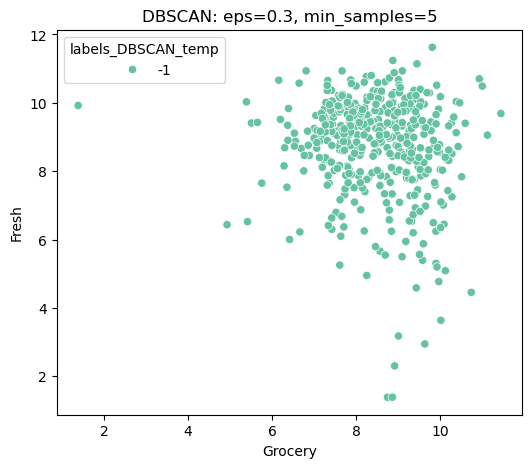

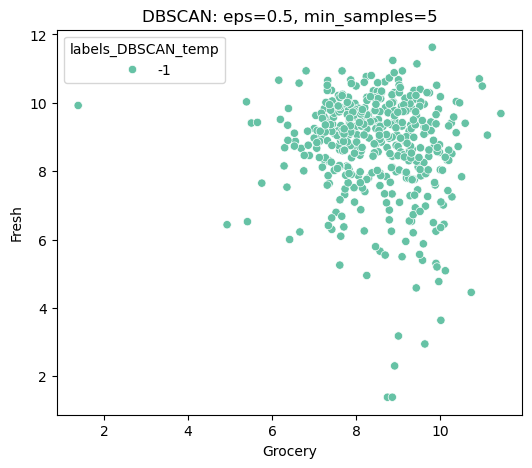

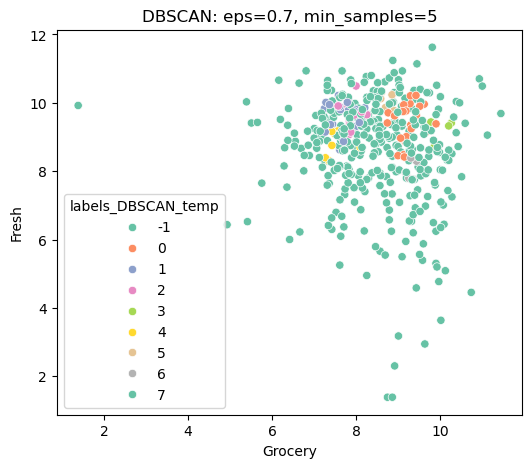

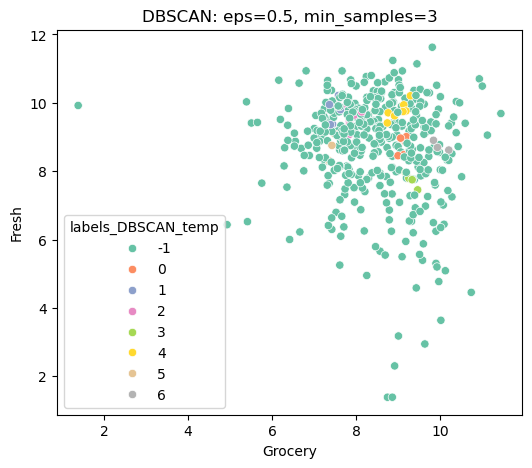

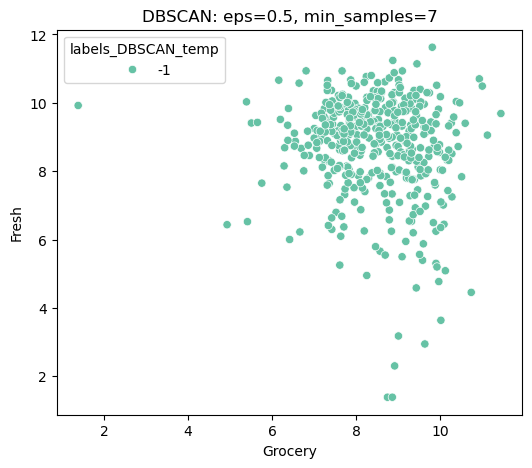

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Different parameters to try
params = [
    {'eps': 0.3, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.7, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 3},
    {'eps': 0.5, 'min_samples': 7}
]

for param in params:
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
    dbscan.fit(customers_scale)
    
    # Add labels to original data
    X['labels_DBSCAN_temp'] = dbscan.labels_
    
    # Visualize Grocery vs Fresh
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=X, x='Grocery', y='Fresh', hue='labels_DBSCAN_temp', palette='Set2')
    plt.title(f"DBSCAN: eps={param['eps']}, min_samples={param['min_samples']}")
    plt.show()


**Your comment here**

- 

#Changing eps and min_samples in DBSCAN significantly affects the clustering results.

#Smaller eps or larger min_samples leads to more points labeled as noise (-1), while larger eps or smaller min_samples can merge clusters together.

#By experimenting with different values and visualizing, we can see how DBSCAN identifies dense regions and handles sparse points differently than K-Means.